Reference: <br>
R. Urbanczik and W. Senn, <br>
"Learning by the Dendritic Prediction of Somatic Spiking," <br> 
Neuron, Volume 81, Issue 3, 5 February 2014, Pages 521-528 <br>
doi: https://doi.org/10.1016/j.neuron.2013.11.030

In [1]:
import os
import sys

import numpy as np
from numpy import cos, pi

from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from bnn.ref import US14

# Simulation 1

In [2]:
model = US14()

In [3]:
dt = 0.1 # (ms)
start = 0 # (ms)
end = 21000 # (ms)
T = np.linspace(start, end, int((end-start)/dt)+1)

This target is inferred from Figure 1, not the exact target used.

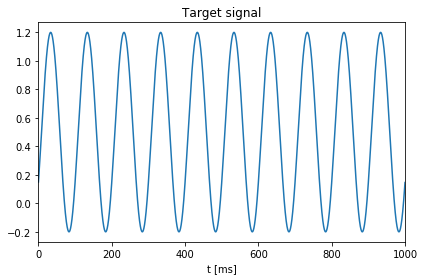

In [4]:
# target
y= 0.7*cos(2*pi/100*T-2/3*pi) + 0.5
xlim_r = np.argwhere(T==1000) [0,0]
plt.plot(T[:xlim_r], y[:xlim_r])
plt.xlim(0,T[xlim_r])
plt.xlabel('t [ms]')
plt.title('Target signal')
plt.tight_layout()

In [5]:
nudge_start = np.argwhere(T==1000)[0,0]
nudge_end = np.argwhere(T==20000)[0,0]
y[:nudge_start] = np.nan
y[nudge_end:] = np.nan

In [6]:
# input
r = 0.01
N_in = 200
L_in = int(200/dt)
x_base = np.random.binomial(1, r*dt, (L_in, N_in))

200 spike trains, with periodicity 200ms and firing rate 0.01kHz. The expected number of spikes in x_base is 400.

In [7]:
x_base.sum()

419

With this setup, some input spike trains will be empty.

In [8]:
spike_per_train = x_base.sum(0)
n_empty_spike_train = (spike_per_train == 0).sum()
print(f"{n_empty_spike_train} out of {N_in} spike trains are empty.")

21 out of 200 spike trains are empty.


In [9]:
X = np.resize(x_base, (T.shape[0], x_base.shape[1]))

In [10]:
model.fit(X, y, dt)

US14(beta=5, e_e=4.666666666666667, e_i=-0.3333333333333333, eta=0.07, g_d=2,
     g_l=0.1, phi_max=0.15, random_state=None, tau_delta=100, tau_l=10, tau_s=3,
     theta=0.86, w_0=0.2, warm_start=True)

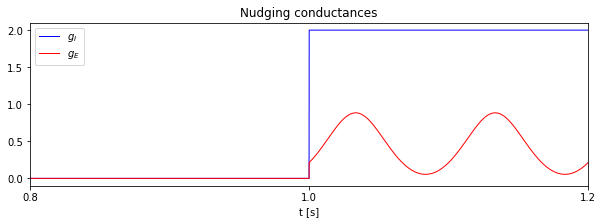

In [11]:
plt.figure(figsize=(10,3))
tlim = [800, 1200]
pltlim = [np.argwhere(T==t)[0,0] for t in tlim]
pltrange = np.s_[pltlim[0]:pltlim[1]]
plt.plot(T[pltrange],model.g_i_[pltrange],color='blue',lw=1,label='$g_I$')
plt.plot(T[pltrange],model.g_e_[pltrange],color='red',lw=1,label='$g_E$')
plt.xticks(np.linspace(*tlim,3), 0.001*np.linspace(*tlim,3))
plt.xlabel('t [s]')
plt.xlim(tlim)
plt.legend(loc=2)
plt.title('Nudging conductances')
plt.show()

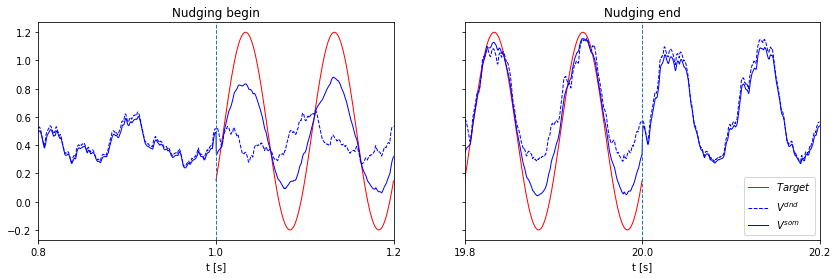

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), sharey=True)

def plot_routine(tlim, vidx, title, ax):
    pltlim = [np.argwhere(T==t)[0,0] for t in tlim]
    pltrange = np.s_[pltlim[0]:pltlim[1]]
    ax.plot(T[pltrange],y[pltrange],color='red',lw=1,label='$Target$')
    ax.plot(T[pltrange],model.v_w_[pltrange],color='blue',ls='--',lw=1,label='$V^{dnd}$')
    ax.plot(T[pltrange],model.u_[pltrange],color='blue',lw=1,label='$V^{som}$')
    ax.set_xticks(np.linspace(*tlim,3))
    ax.set_xticklabels(0.001*np.linspace(*tlim,3))
    ax.set_xlabel('t [s]')
    ax.set_xlim(tlim)
    ax.set_title(title)
    ax.axvline(T[vidx], ls='--', lw=1)

plot_routine([800, 1200], nudge_start, 'Nudging begin', axes[0])
plot_routine([19800, 20200], nudge_end, 'Nudging end', axes[1])

axes[1].legend(loc=4)
plt.show()